In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("spotify.xlsx")

In [3]:
df.head(2)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,390470936.0,30716.0,196631588.0,...,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-04-05 00:00:00,USUG12400910,2,545.9,323703884.0,28113.0,174597137.0,...,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,NaN,1


In [4]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [5]:
df.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                   int64
Track Score                   float64
Spotify Streams               float64
Spotify Playlist Count        float64
Spotify Playlist Reach        float64
Spotify Popularity            float64
YouTube Views                 float64
YouTube Likes                 float64
TikTok Posts                  float64
TikTok Likes                  float64
TikTok Views                  float64
YouTube Playlist Reach        float64
Apple Music Playlist Count    float64
AirPlay Spins                 float64
SiriusXM Spins                float64
Deezer Playlist Count         float64
Deezer Playlist Reach         float64
Amazon Playlist Count         float64
Pandora Streams               float64
Pandora Track Stations        float64
Soundcloud Streams            float64
Shazam Count

In [6]:
df.isnull().sum()

Track                            0
Album Name                       5
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [7]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Fill missing values with zero for numerical columns
df[numerical_columns] = df[numerical_columns].fillna(0)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna('Unknown', inplace=True)
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

In [8]:
df.isnull().sum()

Track                         0
Album Name                    0
Artist                        0
Release Date                  0
ISRC                          0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Soundcloud Streams            0
Shazam Counts                 0
TIDAL Popularity              0
Explicit Track                0
dtype: int64

C:\Users\shich\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


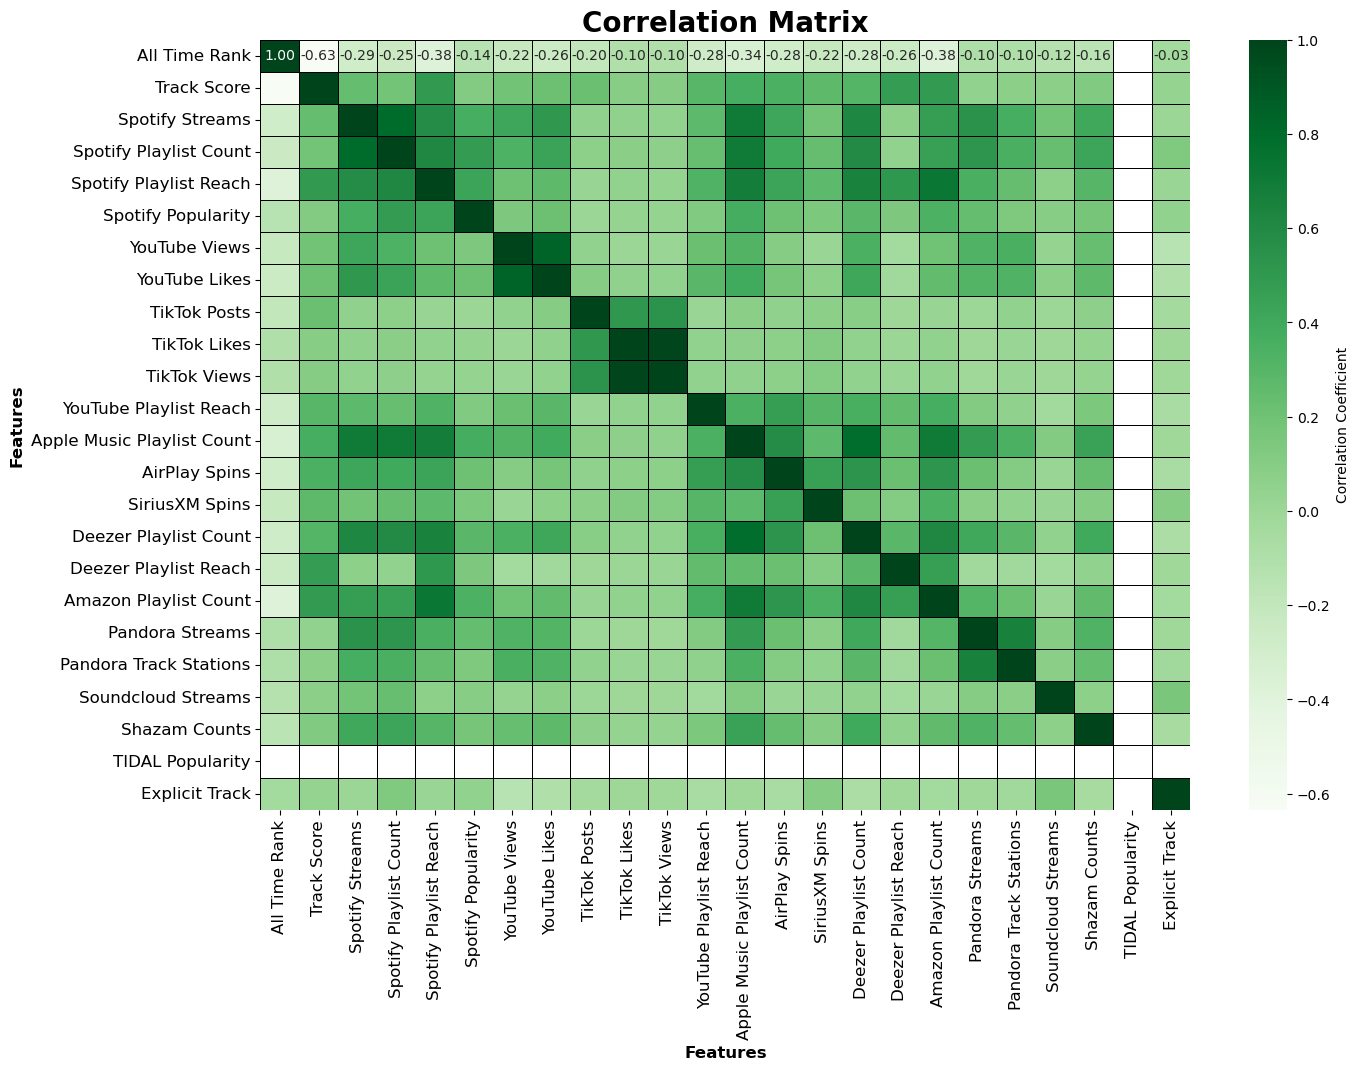

In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the figure size
plt.figure(figsize=(15, 10))

# Create the heatmap with a green color palette
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Greens',  # Green color map
    fmt='.2f',     # Format for annotations
    linewidths=0.5, # Line width for grid lines
    linecolor='black', # Grid line color
    cbar_kws={'label': 'Correlation Coefficient'} # Color bar label
)

# Add a title with a larger font size
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')

# Customize x and y axis labels
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')

# Adjust the tick labels' size and rotation
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)

# Save the plot
plt.savefig('Correlation_Heatmap_Green.png', dpi=300, bbox_inches='tight')

# Optionally show the plot
plt.show()

### Key Insights from Correlation Analysis

- **Spotify Streams and Popularity:** High correlation (0.88) indicates streams are a good predictor of popularity on Spotify.
- **YouTube Views and Likes:** Very strong correlation (0.96) shows high engagement on YouTube.
- **TikTok Views and Likes:** Strong correlation (0.92) reflects high user engagement on TikTok.
- **Playlist Impact:** Spotify playlist count and reach are strongly correlated (0.80), emphasizing playlist importance.
- **Cross-Platform Influence:** Moderate correlation between Spotify streams and Apple Music playlists (0.60) suggests cross-platform synergy.

Understanding these relationships helps in creating targeted strategies to enhance song performance across different platforms.


In [10]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])


correlations = numeric_df.corr()['Spotify Streams'].sort_values(ascending=False)
print(correlations)

Spotify Streams               1.000000
Spotify Playlist Count        0.798058
Apple Music Playlist Count    0.704059
Deezer Playlist Count         0.620392
Spotify Playlist Reach        0.580030
Pandora Streams               0.545221
YouTube Likes                 0.512749
Amazon Playlist Count         0.465277
YouTube Views                 0.417307
AirPlay Spins                 0.416566
Shazam Counts                 0.403285
Pandora Track Stations        0.363738
Spotify Popularity            0.363031
YouTube Playlist Reach        0.277962
Track Score                   0.244176
SiriusXM Spins                0.192206
Soundcloud Streams            0.184727
Deezer Playlist Reach         0.073915
TikTok Posts                  0.061214
TikTok Likes                  0.057028
TikTok Views                  0.044029
Explicit Track                0.009105
All Time Rank                -0.287332
TIDAL Popularity                   NaN
Name: Spotify Streams, dtype: float64


# Comparision of Metrics across Different Platforms

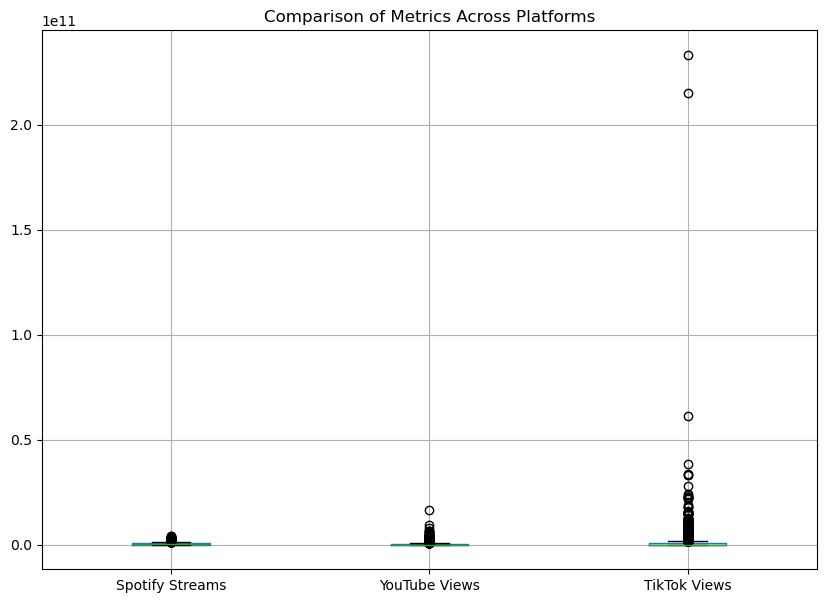

In [11]:
df[['Spotify Streams', 'YouTube Views', 'TikTok Views']].boxplot(figsize=(10, 7))
plt.title('Comparison of Metrics Across Platforms')
# Save the plot
plt.savefig('Correlation_Across_platform.png', dpi=300, bbox_inches='tight')
plt.show()

# ANOVA (Analysis of Variance):

Purpose: To determine if there are significant differences in the means of metrics (e.g., Spotify Streams, YouTube Views, TikTok Views) across multiple platforms.

How It Works: It compares the variance between the groups (platforms) to the variance within each group. A significant F-statistic indicates that at least one platform differs significantly from the others.

Tukey's HSD (Honestly Significant Difference) Test:
Purpose: To identify which specific pairs of platforms have significant differences in their metrics.

How It Works: After finding overall significant differences with ANOVA, Tukey's HSD test performs pairwise comparisons between all platforms to pinpoint which pairs show significant differences.

In summary, ANOVA helps to establish if there are differences overall, while Tukey's HSD helps to find out exactly which platforms differ from each other.

In [12]:
from scipy.stats import f_oneway

# Perform ANOVA
f_stat, p_value = f_oneway(df['Spotify Streams'], df['YouTube Views'], df['TikTok Views'])
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

ANOVA F-statistic: 42.451082031162514, p-value: 4.170835180039842e-19


In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Reshape data for pairwise comparison
data = df.melt(value_vars=['Spotify Streams', 'YouTube Views', 'TikTok Views'], var_name='Platform', value_name='Metric')

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=data['Metric'], groups=data['Platform'], alpha=0.05)
print(tukey)

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
     group1         group2        meandiff    p-adj       lower           upper      reject
-------------------------------------------------------------------------------------------
Spotify Streams  TikTok Views  477131121.7702    0.0  327289733.1658  626972510.3746   True
Spotify Streams YouTube Views  -60570287.0613 0.6102 -210411675.6657   89271101.5431  False
   TikTok Views YouTube Views -537701408.8315    0.0  -687542797.436 -387860020.2271   True
-------------------------------------------------------------------------------------------


### TikTok vs. Other Platforms:

TikTok shows significantly higher metrics compared to Spotify and YouTube. This suggests that TikTok is currently outperforming these other platforms in terms of views.
If the goal is to maximize visibility and engagement, consider focusing more efforts on TikTok.

# Visualizing findings

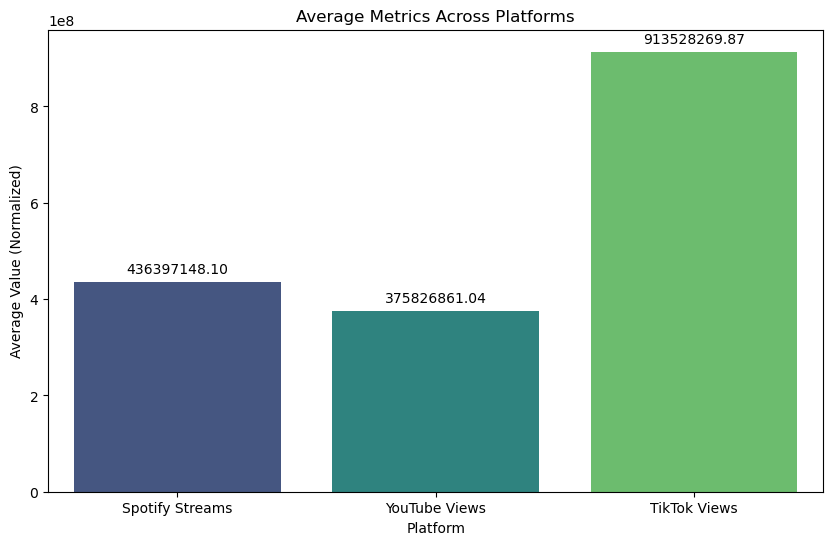

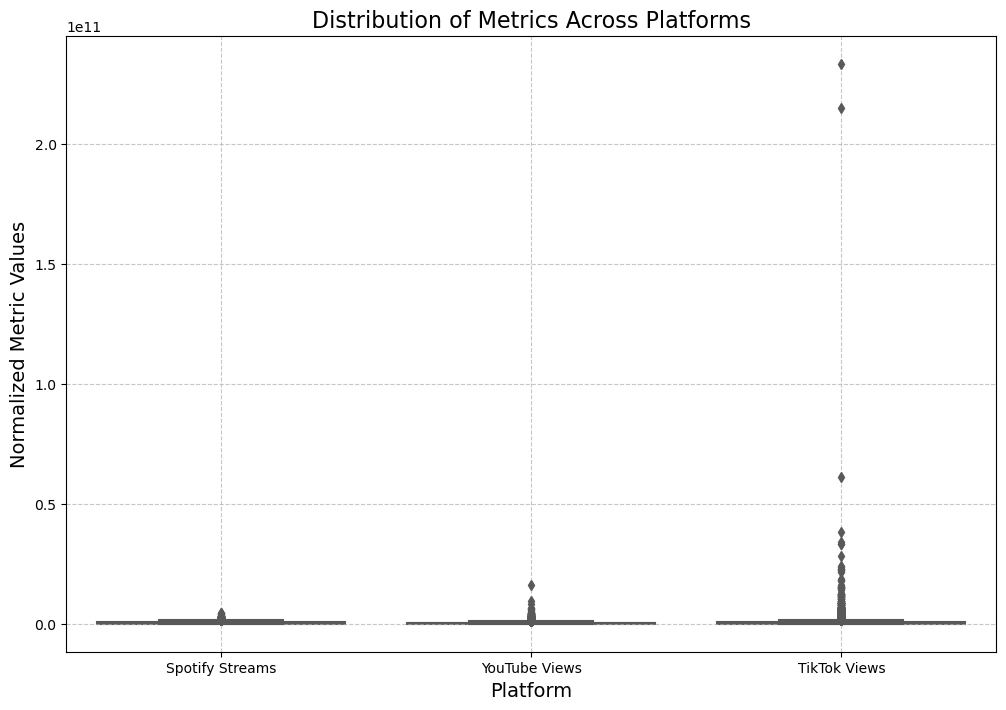

In [14]:
# Prepare data for bar chart
average_metrics = df[['Spotify Streams', 'YouTube Views', 'TikTok Views']].mean()
average_metrics = average_metrics.reset_index()
average_metrics.columns = ['Platform', 'Average Value']

# Bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Platform', y='Average Value', data=average_metrics, palette='viridis')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')
plt.title('Average Metrics Across Platforms')
plt.ylabel('Average Value (Normalized)')
plt.xlabel('Platform')

plt.savefig('Average_across_platform.png', dpi=300, bbox_inches='tight')
plt.show()


# Boxplot for distribution of metrics
# Set up the plot
plt.figure(figsize=(12, 8))

# Create the boxplot
ax = sns.boxplot(data=df[['Spotify Streams', 'YouTube Views', 'TikTok Views']], palette='Set2')

# Add labels and other details
plt.title('Distribution of Metrics Across Platforms', fontsize=16)
plt.ylabel('Normalized Metric Values', fontsize=14)
plt.xlabel('Platform', fontsize=14)

# Add platform labels
ax.set_xticklabels(['Spotify Streams', 'YouTube Views', 'TikTok Views'])

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Save the plot


plt.show()

## Conclusion

TikTok significantly outperforms Spotify and YouTube in metrics, making it the top platform for visibility and engagement. Prioritize efforts on TikTok to enhance performance.